In [ ]:
"""Тренировки по ML. Лекция 2: Линейная регрессия и регуляризация."""

["Тренировки по ML. Лекция 2: Линейная регрессия и регуляризация.](https://www.youtube.com/watch?v=5qLVUO0q644)

1. Linear models overview
2. Linear Regression under the hood
3. Gauss-Markov theorem
4. Model validation and evaluation

#### 01 Linear models overview

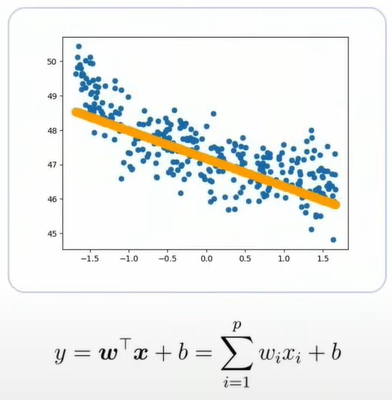

Есть множество каких-то данных. Случай одномерный (всего один признак) и целевая переменная по вертикальной оси. Также используем линейную модель - линейную комбинацию признаков плюс свободный член (чтобы линия не проходила не через ноль).

Линейные модели бывают регрессионными, бывают для классификации.

Линейный классификатор - классификатор, который строит линейную разделяющую поверхность (гиперплоскость для многомерного случая).

#### 02 Linear Regression under the hood

Пусть есть выборка. Предположим, что $y$ описывается линейной комбинацией признаков плюс свободный член.

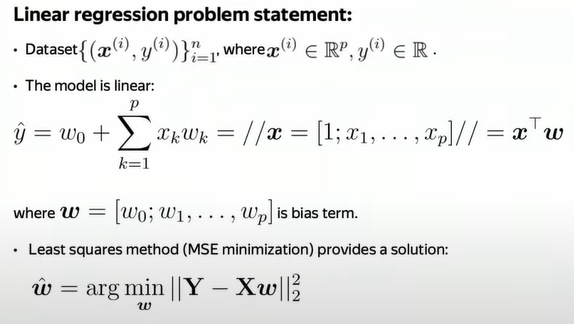

$
\textit{\textbf{x}} =
\begin{bmatrix}
    1 \\ x_{1} \\ ... \\ x_{p}
\end{bmatrix}
\textit{\textbf{w}} =
\begin{bmatrix}
    w_{0} \\ w_{1} \\ ... \\ w_{p}
\end{bmatrix}
$

В качестве функции потерь выбираем средняя квадратичная ошибка. Тогда оптимальный вектор параметров будет достигаться нахождением минимума величины $||\textbf{Y} - \textbf{X\textit{w}}||^2_2$

Здесь $\textbf{X\textit{w}}$ - вектор предсказаний

Таким образом, нам нужно найти оптимальный вектор параметров, чтобы минимизировать функцию ошибки.

Чтобы найти минимум данной функции потерь, нам достаточно продифференцировать функцию потерь и найти точку, где производная равна нулю.

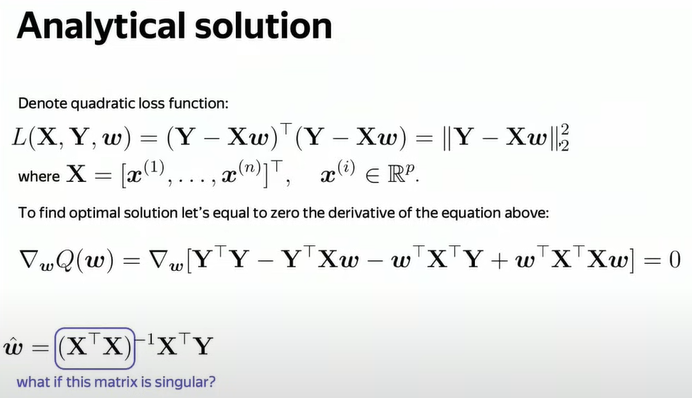

L и Q - здесь одно и то же (опечатка на слайде)

$\hat{w} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{Y}$ - аналитическое решение задачи линейной регрессии со средней квадратичной функцией ошибки. Так как 
то парабола, то мы нашли глобальный минимум.

Аналитическое решение включает в себя обращение матрицы. Если ковариационная матрица $\textbf{X}^{T}\textbf{X}$ (размером число фичей на число фичей) вырожденная, то обратная матрица не существует $(\textbf{X}^{T}\textbf{X})^{-1}$

Почему она может быть вырожденной? Несколько признаков могут быть скоррелированы друг с другом или даже линейно зависимы, тогда ковариационная матрица вырожденная, так как там есть зависимые строки или столбцы, обратить её нельзя, единственного решения не существует.

Для выхода из этой ситуации можно воспользоваться регуляризацией по Тихонову - добавить к матрице $\textbf{X}^{T}\textbf{X}$ диагональную матрицу:

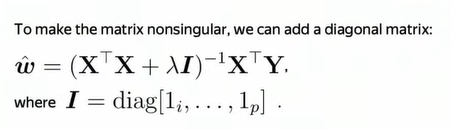

$\lambda$ - неотрицательная константа.

Теперь матрица стала обратимой, но теперь эта функция будет минимизировать не изначальную функцию ошибки, а следующую величину:

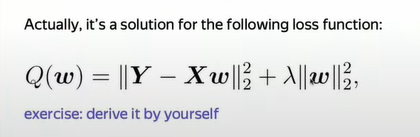

Метод регуляризации в данном случае говорит, что мы внесли дополнительное ограничение на вектор весов, сказав, что норма векторов весов также должна минимизироваться при минимизации функции ошибки, поэтому от истинного оптимума мы отошли, но при этом варьируя коэффициент $\lambda$ мы можем варьировать, как далеко мы от него уйдём. Чем больше $\lambda$, тем более устойчивым у нас будет решение (меньше у нас будет меняться $\textbf{\textit{w}}$ если мы чуть чуть поменяем наши данные). С другой стороны, если $\lambda = 0$, то мы получаем исходное решение, точно попадаем в оптимум, но если у нас ковариационная матрица вырожденная, то решения не существует, и мы попасть в оптимум не можем.

#### 03 Gauss-Markov theorem

Пусть данные описываются линейной зависимостью плюс некоторый случайный шум:

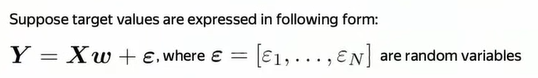

Предполагаем, что шум центрированный (1), дисперсия шума конечна (2), шум не скоррелирован:

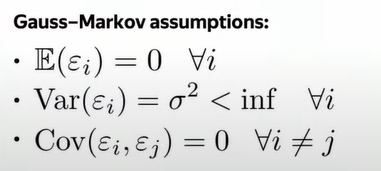

Тогда аналитическое решение функции средней квадратичной ошибки является оптимальной оценкой среди несмещённых, то есть минимизация функции средней квадратичной ошибки доставляет оптимальную среди несмещённых оценку.

Это работает, когда нет регуляризации.

На будущее: аналитическое решение редко используется на практике, так как обращать матрицу дорого. Поэтому аще используется метод градиентного спуска.

**Градиент** - направление наискорейшего возрастания функции. **Антиградиент** - направление наискорейшего убывания функции.

На практике используется стохастический градиентный спуск.

**Функции потерь**

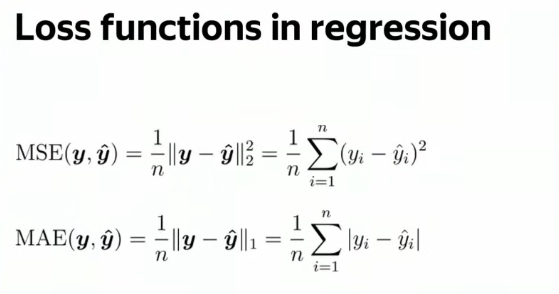

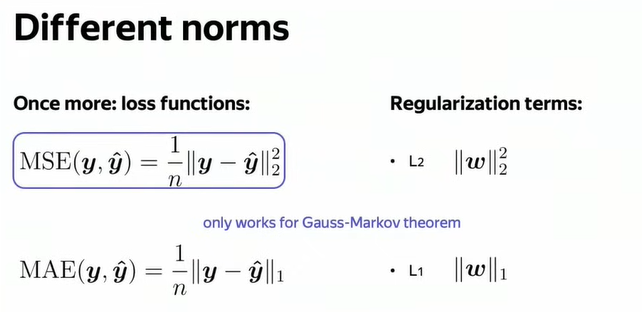

Теорема Гаусса-Маркова работает только для средней квадратичной ошибки (MSE). Для всего остального она не работает.

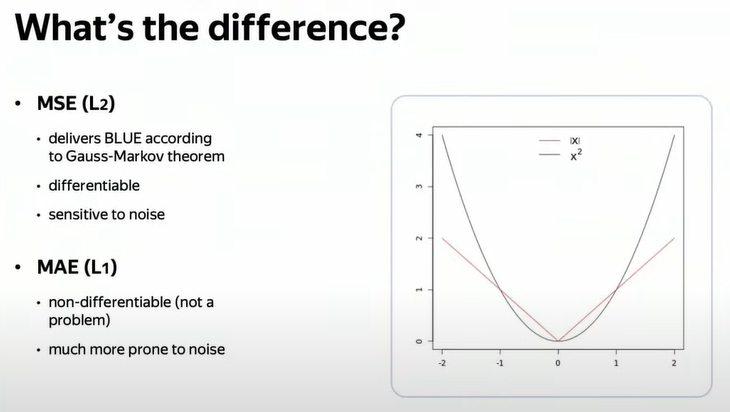

Минимизация средней квадратичной ошибки (L2):
1. Доставляет оптимальную среди несмещённых оценку (best linear unbiased estimator)
2. Дифференцируема
3. Чувствительна к шуму (чем больше ошибка между предсказанием и реальным значением, тем квадратично больший вклад будет вносить квадратичная функция потерь)

MAE (L1):
1. Менее чувствительна к шуму и выбросам
2. Производная не определена в нуле. Необходимо доопределять

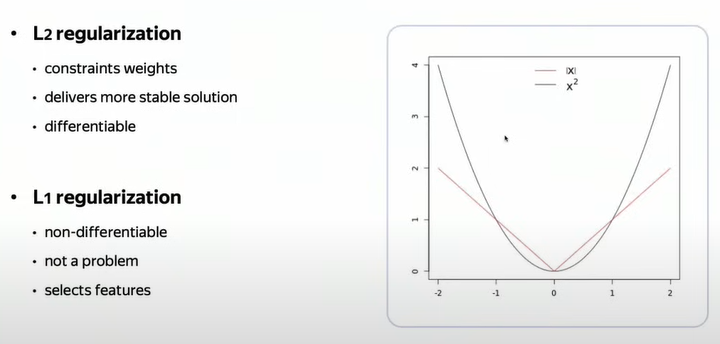

**Отбор признаков** - в векторе весов появляются явные нули.

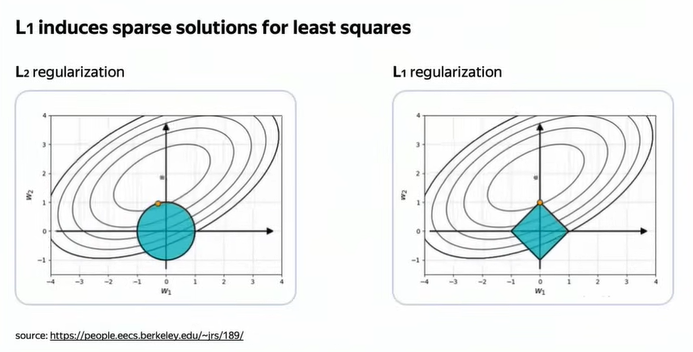

Не только L1 и L2 нормы вектора отклонений используются в качестве функции потерь. Есть другие способы оценить качество:

+ R2 score - попытка соотнести среднюю квадратичную ошибку с дисперсией таргета и понять, чем одно лучше, чем другое
+ MAPE - нормируется значение таргета, чтобы получить в процентах от таргета, насколько мы ошиблись
+ SMAPE - среднее между таргетом и предиктом

#### 04 Model validation and evaluation

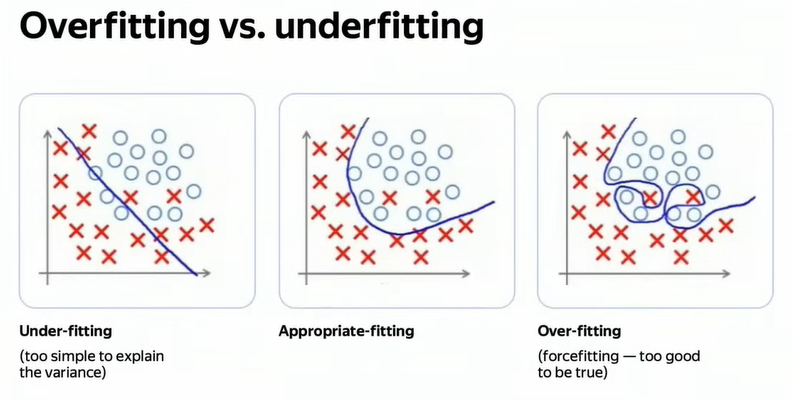

Есть недообучение, есть подходящая модель и есть переобучение

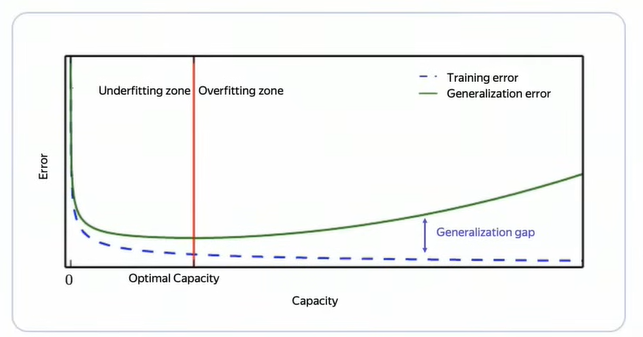

Иллюстрация и Deep Learning Book

Чем больше объём параметров (Capacity), которые модель может выучить, ошибка на обучающей выборке падает, а на отложенной (на невиданных ранее данных) она сначала падает, а потом растёт - модель внутрь своих параметров начинает запихивать какие-то специфичные для обучающей выборки данные.

Переобучение - не очень хорошо.

Как понять на практике, что модель хорошая или нет. Потому что, пока мы сидим только на обучающей выборке, функция потерь падает: чем больше модель - тем лучше.

1. Самый простой метод: взяли кусок от обучающей выборки и сделали его отложенной выборкой.

Проблема в том, что можно отрубить неудачный кусок. То есть распределение в тесте отличается от обучающей выборки.

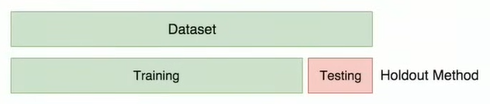

2. Можно нарубить выборку много раз на случайные подвыборки и обучать много раз на всех кроме одной, а на исключённой делать валидацию.

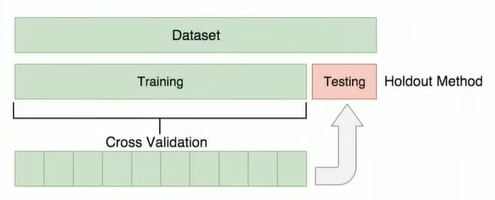

Много раз обучаем модель, много раз валидируем, затем усредняем ошибку по всем валидационным фолдам и получаем оценку ошибки по всей выборке, так как обучались на всей выборке кроме каждого фолда. Потом на нём валидировались. Делали столько раз, сколько фолдов.

Штука классная, пока хватает ресурсов.

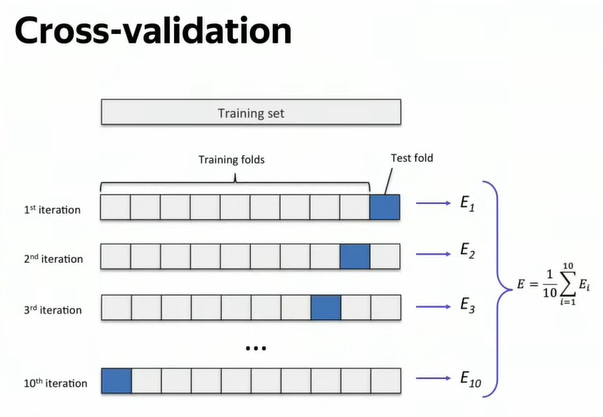

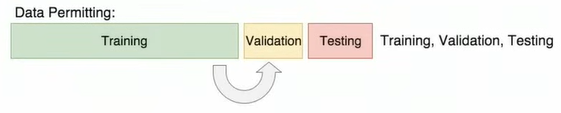

На обучающей части выборки мы подбираем оптимальные значения параметров, чтобы получить наилучшее качество на этой обучающей выборке. То есть мы немного переобучаемся под обучающую выборку, с точки зрения решения оптимизационной задачи, так как мы стремимся к минимальной ошибке на ней.

Далее на валидационной выборке смотрим качество нашей модели там, где она не видела значений и предсказаний. И при этом по валидационной выборке мы оцениваем выбор набора гиперпараметров (с такими гиперпараметрами модель лучше, чем с другими), так как на обучающей выборке мы не можем этого оценить (модель могла переобучиться с такими гиперпараметрами).

Выбирая гиперпараметры на валидационных данных, мы допускаем утечку данных через себя в гиперпараметры.

Тестовая выборка для того, чтобы решить отправлять модель в прод либо начинать по-новой. То есть мы не сравниваем модели на тестовой выборке, чтобы выбрать наилучшую, и потом её дорабатывать.

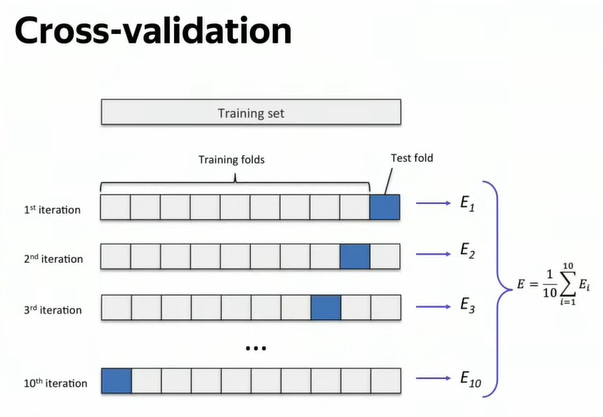

Как получить параметры модели, которые будут оптимальны?

1. Можно взять наилучший гиперпараметр согласно кросс-валидации и обучиться на всей обучающей выборке
2. Если это линейная модель, то взять и усреднить параметры, полученные при обучении по всем фолдам

#### Outro

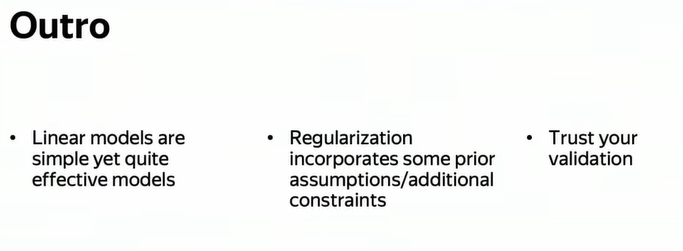